In [1]:
import os
os.chdir("C:\\Users\\Sai\\Downloads\\Udemy_Python\\datacode")

In [2]:
import pandas as pd
creditrisk=pd.read_csv("cs-training.csv")

In [67]:
import numpy as np

In [3]:
creditrisk.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
creditrisk.columns

Index(['ID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [5]:
#creditrisk.info() 
creditrisk['SeriousDlqin2yrs'].unique()
#classificatoin problem
#SeriousDlqin2yrs is dependent variables

array([1, 0], dtype=int64)

In [6]:
creditrisk.isnull().sum()
#modifiedDataset=dataset.fillna(" ")
#dataset.fillna(dataset.mean())
#modifiedDataset = dataset.dropna()
creditrisk.isnull().values
#creditrisk.isnull().any(axis=1).sum()
MI=creditrisk[creditrisk['NumberOfDependents'].isnull()]
modified=creditrisk['NumberOfDependents'].fillna(999)
creditrisk['NumberOfDependents']=modified
creditrisk.isnull().sum()
creditrisk[creditrisk['NumberOfDependents']==999]['MonthlyIncome'].isnull().sum()
#creditrisk.columns
creditrisk[creditrisk['NumberOfDependents']==999].index
creditrisk.drop(creditrisk[creditrisk['NumberOfDependents']==999].index, inplace=True)
creditrisk['NumberOfDependents'].size
#creditrisk['MonthlyIncome'].isnull().sum()
#creditrisk.drop('NumberOfDependents',axis=1)

146076

In [7]:
#creditrisk.info()
creditrisk.isnull().sum()
creditrisk.dropna(inplace=True) 

In [8]:
creditrisk.isnull().sum()
creditrisk.shape

(120269, 12)

In [9]:
creditrisk['MonthlyIncome'].mean()
#creditrisk['MonthlyIncome'].isnull()
#plt.hist(creditrisk['MonthlyIncome'])
creditrisk['MonthlyIncome'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [10]:
creditrisk['NumberOfDependents'].unique()

array([ 2.,  1.,  0.,  3.,  4.,  5.,  6.,  8.,  7., 20., 10.,  9., 13.])

In [11]:
creditrisk['NumberOfDependents'].describe
import matplotlib.pyplot as plt
#plt.hist(creditrisk['NumberOfDependents'])
#plt.bar(creditrisk['NumberOfDependents'])
creditrisk['NumberOfDependents'].value_counts()
#creditrisk['MonthlyIncome'].unique()

0.0     65456
1.0     24379
2.0     18110
3.0      8745
4.0      2658
5.0       689
6.0       150
7.0        49
8.0        22
10.0        5
9.0         4
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

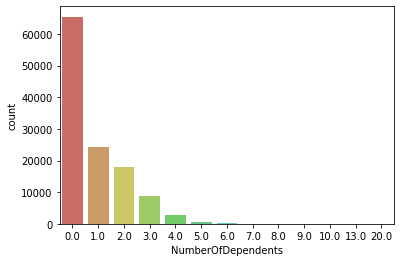

In [12]:
import seaborn as sns
sns.countplot(x='NumberOfDependents',data=creditrisk, palette='hls')
plt.show()

In [13]:
creditrisk.groupby("NumberOfDependents").mean()
#creditrisk.groupby("SeriousDlqin2yrs").mean()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
NumberOfDependents,,,,,,,,,,,
0.0,75047.140094,0.059490,5.419854,53.635114,0.374511,26.242452,5873.411467,8.487656,0.227924,0.922528,0.207956
1.0,74761.419049,0.074572,5.013580,51.631117,0.368309,14.763965,7205.172361,9.200665,0.186841,1.143525,0.156651
2.0,75368.220872,0.082054,7.647192,46.202209,0.418112,34.358824,7576.163446,9.028879,0.207786,1.261403,0.185036
3.0,75061.130932,0.090566,10.102346,45.636135,0.370726,42.293361,8396.601029,8.914580,0.168897,1.272384,0.131504
4.0,74424.961625,0.104590,2.024736,45.376223,0.451467,32.266914,8691.199398,8.963130,0.209932,1.285553,0.176825
5.0,74985.937591,0.089985,0.395132,45.943396,0.480406,50.657772,9260.174165,9.023222,0.275762,1.304790,0.245283
6.0,74925.900000,0.133333,0.424608,47.133333,0.333333,19.108910,8686.493333,8.893333,0.073333,1.200000,0.073333
7.0,77328.591837,0.102041,0.408293,48.591837,0.387755,42.734145,8934.653061,8.204082,0.142857,1.224490,0.163265
8.0,80669.090909,0.090909,0.315804,49.727273,0.181818,0.238619,8312.954545,7.636364,0.181818,1.272727,0.000000


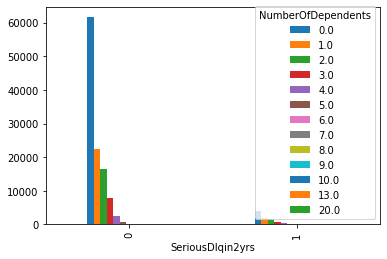

In [14]:
%matplotlib inline
pd.crosstab(creditrisk.SeriousDlqin2yrs,creditrisk.NumberOfDependents).plot(kind='bar')

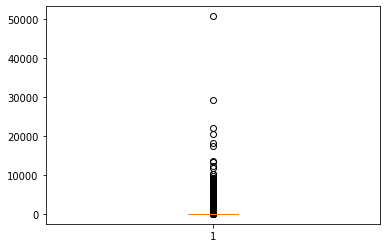

In [15]:
plt.boxplot(creditrisk.RevolvingUtilizationOfUnsecuredLines)
creditrisk.loc[creditrisk["RevolvingUtilizationOfUnsecuredLines"]>20000,'RevolvingUtilizationOfUnsecuredLines'] = 20000

In [16]:
creditrisk[creditrisk["RevolvingUtilizationOfUnsecuredLines"]>20000]

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


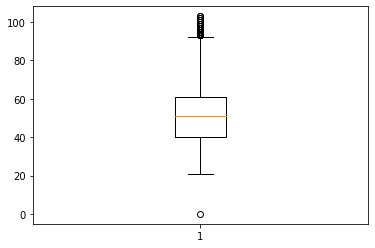

In [17]:
plt.boxplot(creditrisk.age)
creditrisk[creditrisk["age"]<10].index
creditrisk.drop(creditrisk[creditrisk["age"]<10].index, inplace=True)

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


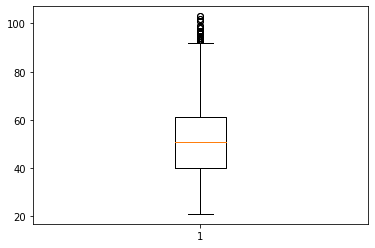

In [18]:
plt.boxplot(creditrisk.age)
creditrisk[creditrisk["age"]<10]

Index(['ID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

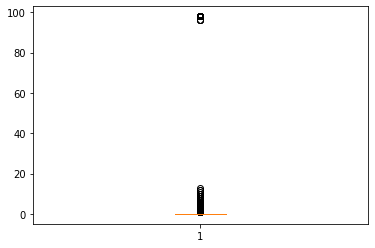

In [19]:
plt.boxplot(creditrisk['NumberOfTime30-59DaysPastDueNotWorse'])
creditrisk[creditrisk['NumberOfTime30-59DaysPastDueNotWorse']>50]
creditrisk.columns
#plt.boxplot(creditrisk['DebtRatio'])
#creditrisk[creditrisk['DebtRatio']>40000]
#plt.hist(creditrisk['MonthlyIncome'])

In [20]:
creditrisk.columns
creditrisk1=creditrisk.drop("ID", axis=1)

In [21]:
#this is used for normalization, if there are outliers then min max scaler is not effective. Minmax scaler is sensitive to outliers

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
creditrisk_scale = scaler.fit_transform(creditrisk1)

In [22]:
creditrisk_scale.shape
#creditrisk_scale.head()
creditrisk_scale=pd.DataFrame(creditrisk_scale)

In [23]:
creditrisk_scale.columns=creditrisk1.columns
creditrisk_scale.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1.0,0.000038,0.292683,0.020408,1.314070e-05,0.003031,0.224138,0.000000,0.111111,0.0,0.10
1,0.0,0.000048,0.231707,0.000000,1.994488e-06,0.000864,0.068966,0.000000,0.000000,0.0,0.05
2,0.0,0.000033,0.207317,0.010204,1.392869e-06,0.001011,0.034483,0.010204,0.000000,0.0,0.00
3,0.0,0.000012,0.109756,0.000000,5.899484e-07,0.001097,0.086207,0.000000,0.000000,0.0,0.00
4,0.0,0.000045,0.341463,0.010204,4.079058e-07,0.021134,0.120690,0.000000,0.018519,0.0,0.00


In [24]:
X = creditrisk_scale.drop("SeriousDlqin2yrs", axis=1)
y = creditrisk_scale['SeriousDlqin2yrs']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 200,test_size=0.25)

In [26]:
import sklearn.tree as tree
Dec_tree = tree.DecisionTreeClassifier(max_depth=3,random_state=200)
Dec_tree.fit(X_train,y_train)
Dec_tree.score(X_test,y_test)

0.9325838959656767

In [27]:
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,Dec_tree.predict_proba(X_test)[:,1])  # Area under the curve

0.7364749050503242

In [28]:
creditrisk_scale['SeriousDlqin2yrs'].unique()
creditrisk_scale['SeriousDlqin2yrs'].value_counts()  


0.0    111911
1.0      8357
Name: SeriousDlqin2yrs, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 200,test_size=0.25,stratify=y)

In [30]:
import sklearn.tree as tree
Dec_tree = tree.DecisionTreeClassifier(max_depth=3,random_state=200)
Dec_tree.fit(X_train,y_train)
Dec_tree_test_score =Dec_tree.score(X_test,y_test)
print("Testing score:",Dec_tree_test_score)

Testing score: 0.9331160408421193


In [31]:
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,Dec_tree.predict_proba(X_test)[:,1])  # Area under the curve

0.771440887305936

In [32]:
#import sys
#!{sys.executable} -m pip install model_selection

In [33]:
import graphviz
import pydotplus

In [34]:
y_test.dtype

dtype('float64')

NameError: name 'Image' is not defined

AttributeError: 'Series' object has no attribute 'columns'

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


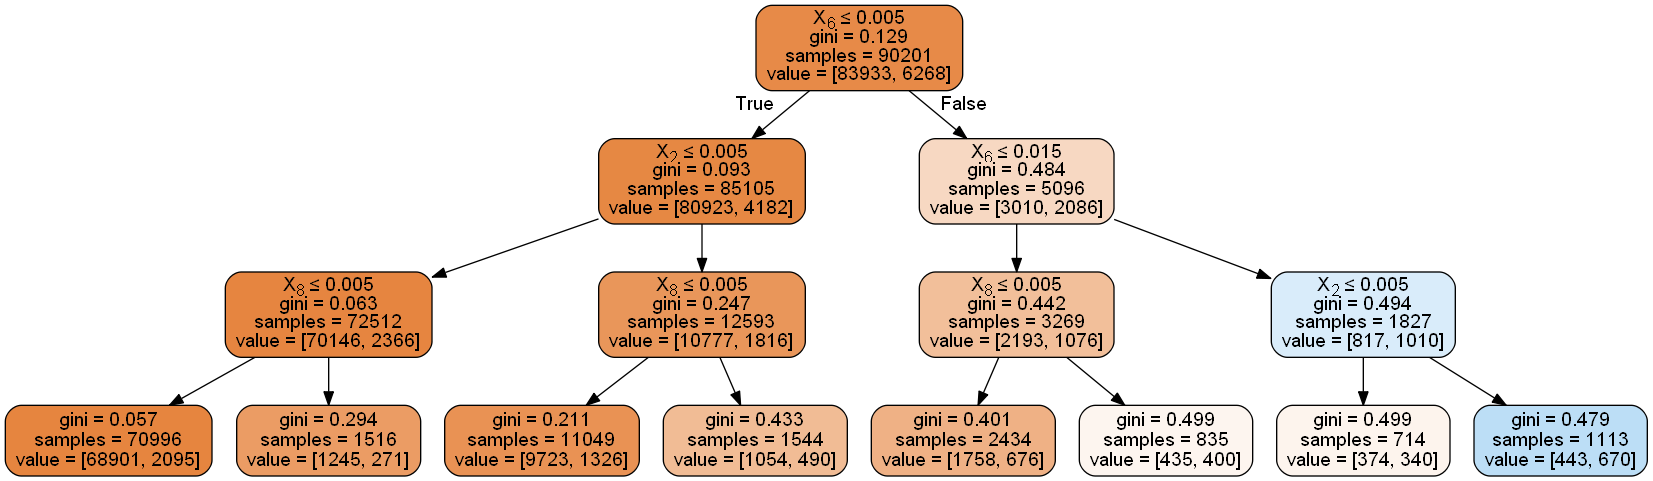

In [36]:

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(Dec_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [37]:
#Grid Search CV
from sklearn import model_selection
clf = tree.DecisionTreeClassifier(max_depth=3,random_state=200)
mod= model_selection.GridSearchCV(clf,param_grid={'max_depth':[2,3,4,5,6]})
mod.fit(X_train,y_train)
mod.best_estimator_
mod.best_score_
print(mod.best_estimator_ , "\nBest score is :" , mod.best_score_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=200, splitter='best') 
Best score is : 0.933426447592703


In [38]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)
clf.fit(X_train,y_train)
clf.oob_score_

0.9312646201261627

In [41]:
print('OOB SCORE :' ,clf.oob_score_)

OOB SCORE : 0.9312646201261627


In [51]:
for w in range(10,400,20):
    clf=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=400)
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    AUC = metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])
    print('For n_estimators=' +str(w))
    print('OOB score is ' +str(oob))
    print('AUC :' +str(AUC))
    print('********')

C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Sai\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For n_estimators=10
OOB score is 0.9230385472444873
AUC :0.7727460997273349
********
For n_estimators=30
OOB score is 0.9296238400904646
AUC :0.8121907296990274
********
For n_estimators=50
OOB score is 0.930410971053536
AUC :0.8220892870726817
********
For n_estimators=70
OOB score is 0.9308211660624605
AUC :0.8260172776113734
********
For n_estimators=90
OOB score is 0.9312424474229776
AUC :0.82706181369818
********
For n_estimators=110
OOB score is 0.931430915400051
AUC :0.8297788411403462
********
For n_estimators=130
OOB score is 0.9314087426968659
AUC :0.8311584897399895
********
For n_estimators=150
OOB score is 0.9318078513541979
AUC :0.8332530370491128
********
For n_estimators=170
OOB score is 0.9320406647376415
AUC :0.8336716282686858
********
For n_estimators=190
OOB score is 0.9319741466280862
AUC :0.8338391588604066
********
For n_estimators=210
OOB score is 0.9320074056828638
AUC :0.8345436890320135
********
For n_estimators=230
OOB score is 0.932051751089234
AUC :0.8348

In [52]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=70,oob_score=True,n_jobs=-1,random_state=400)
clf.fit(X_train,y_train)
clf.oob_score_

0.9308211660624605

In [53]:
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])  # Area under the curve

0.8260173888250637

In [54]:
clf.feature_importances_

array([0.17282796, 0.12860737, 0.05294753, 0.14785967, 0.17899391,
       0.09636835, 0.08902383, 0.03720332, 0.05041254, 0.04575551])

In [57]:
#Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
mod = GradientBoostingClassifier(n_estimators=70,random_state=400)
mod.fit(X_train,y_train)
mod.score(X_test,y_test)

0.9358432833338877

In [62]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb.score(X_test, y_test)))
   
    print()

Learning rate:  0.05
Accuracy score (training): 0.931
Accuracy score (test): 0.931

Learning rate:  0.1
Accuracy score (training): 0.932
Accuracy score (test): 0.933

Learning rate:  0.25
Accuracy score (training): 0.933
Accuracy score (test): 0.934

Learning rate:  0.5
Accuracy score (training): 0.931
Accuracy score (test): 0.932

Learning rate:  0.75
Accuracy score (training): 0.933
Accuracy score (test): 0.933

Learning rate:  1
Accuracy score (training): 0.930
Accuracy score (test): 0.930



In [65]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Output confusion matrix and classification report of Gradient Boosting algorithm on validation set
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.25, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()
print("Classification Report")
print(classification_report(y_test, predictions))

# ROC curve and Area-Under-Curve (AUC)
y_scores_gb = gb.decision_function(X_test)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))


Confusion Matrix:
[[27743   235]
 [ 1746   343]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     27978
         1.0       0.59      0.16      0.26      2089

    accuracy                           0.93     30067
   macro avg       0.77      0.58      0.61     30067
weighted avg       0.92      0.93      0.92     30067

Area under ROC curve = 0.82


In [ ]:
#Gridsearch CV

In [71]:

from sklearn.model_selection import GridSearchCV
"""parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[2,3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10,20,30,40,50]
    }"""

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "n_estimators":[10,20,30,40]
    }
clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)

clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_params_)

0.9355772108956664
{'learning_rate': 0.15, 'loss': 'deviance', 'n_estimators': 40}
